In [ ]:
# %%html
# <script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);


# </script>


# <form action="javascript:code_toggle()"><input type="submit" value=" 
# Curso: Diseño y mantenimiento de instalaciones de energía solar fotovoltaica
# Alumno: Francisco Manuel Roman Gamez

# "></form>

In [1]:

# https://ec.europa.eu/jrc/en/PVGIS/docs/noninteractive
# https://ec.europa.eu/jrc/en/PVGIS/releases/pvgis51
# https://re.jrc.ec.europa.eu/pvg_tools/es/#MR

from flask import Flask, jsonify, render_template, request, session
import pandas as pd # data wrangling
import requests as requests
import pandas as pd 
import json
import datetime
from math import pi

import numpy as np
import matplotlib.pyplot as plt
# 

In [2]:
tuples=[(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0),(4,1),(5,0),(5,1),(6,0),(6,1),(7,0),(7,1)]
index=pd.MultiIndex.from_tuples(tuples)

In [50]:
p=[[-115,1],[-100,3],[-100,3],[-60,1],[-50,3],[-40,6],[-40,15],[-20,15],[-10,3],[0,6],[0,15],[10,25],[30,5],[50,7],[80,20],[100,10]]

df=pd.DataFrame(p, index=index)
# df

In [51]:
# df.loc[0,:].at[1,0]

In [52]:
st=pd.Series(0, index=np.arange(360))
# =====================

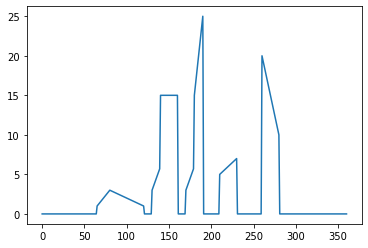

In [53]:
def horizonte(p,df):
    dfp=df.loc[p,:]
    pp=dfp.values.tolist()
    pp.sort()
    pp=([-180,0],[pp[0][0]-1,0],pp[0],pp[1],[pp[1][0]+1,0],[180,0])
    ddf=pd.DataFrame(pp)
    ddf[0]=ddf[0]+180

    d = pd.Series(np.nan, index=np.arange(360))

    ii=ddf.index.tolist()
    for i in ii: 
        d.at[ddf.at[i,0]]=ddf.at[i,1]
    s=d.interpolate()
    return s
puntos=list(set(index.get_level_values(0)))
for p in puntos:
    s=horizonte(p,df)
    st=st.combine(s, max, 0)
st.plot()

In [ ]:
hh=st.tolist()
hh = [round(x,2) for x in hh]
hh=hh[0:359]


In [8]:
lat='40';lon='-4'


In [9]:
# Calculos
# ????????????????   irraciacion
# url="https://re.jrc.ec.europa.eu/api/DRcalc?lat="+lat+"&lon="+lon+"&month="+mes+"&global=1"

url="https://re.jrc.ec.europa.eu/api/PVcalc?lat="+lat+"&lon="+lon+"&peakpower=1&loss=0"
url=url+"&angle=30" # angle Inclination angle from horizontal plane of the (fixed) PV system. 
url=url+"&aspect=44"    #Orientation (azimuth) angle of the (fixed) PV system, 0=south, 90=west, -90=east.
url=url+"&localtime=1"
url=url+"&outputformat=json"
# hh=[0,10,20,80,40,15,25,5]
url=url+"&userhorizon="+str(hh).strip('[]')
# print(url)
r = requests.get(url)
data = r.json()
j=data["outputs"]["totals"]
# data

In [10]:
d = pd.Series(0, index=np.arange(359))
hh=d.tolist()

In [16]:
# Calculos
# ????????????????   irraciacion
# url="https://re.jrc.ec.europa.eu/api/DRcalc?lat="+lat+"&lon="+lon+"&month="+mes+"&global=1"

url="https://re.jrc.ec.europa.eu/api/PVcalc?lat="+lat+"&lon="+lon+"&peakpower=1&loss=0"
    
url=url+"&localtime=1"
url=url+"&outputformat=json"
url=url+"&userhorizon="+str(hh).strip('[]')

# url=url+"&userhorizon="+str(hh).strip('[]')
# print(url)
r = requests.get(url)
data = r.json()
data
j=data["outputs"]["totals"]
j

{'fixed': {'E_d': 4.46,
  'E_m': 135.55,
  'E_y': 1626.56,
  'H(i)_d': 4.99,
  'H(i)_m': 151.74,
  'H(i)_y': 1820.88,
  'SD_m': 2.87,
  'SD_y': 34.47,
  'l_aoi': -3.69,
  'l_spec': '0.31',
  'l_tg': -7.54,
  'l_total': -10.67}}

In [17]:
jf= json.dumps(j, indent=2)
df=pd.read_json(jf, orient='records') 
df.T

,E_d,E_m,E_y,H(i)_d,H(i)_m,H(i)_y,SD_m,SD_y,l_aoi,l_spec,l_tg,l_total
fixed,4.46,135.55,1626.56,4.99,151.74,1820.88,2.87,34.47,-3.69,0.31,-7.54,-10.67


In [13]:
# Calculos
# ????????????????   irraciacion
# url="https://re.jrc.ec.europa.eu/api/DRcalc?lat="+lat+"&lon="+lon+"&month="+mes+"&global=1"

url="https://re.jrc.ec.europa.eu/api/PVcalc?lat="+lat+"&lon="+lon+"&peakpower=1&loss=0"
    
url=url+"&localtime=1"
url=url+"&outputformat=json"
print(url)


https://re.jrc.ec.europa.eu/api/PVcalc?lat=40&lon=-4&peakpower=1&loss=0&localtime=1&outputformat=json


,month,E_d,E_m,H(i)_d,H(i)_m,SD_m
0,1,2.14,66.38,2.31,71.65,9.29
1,2,3.12,87.33,3.31,92.55,9.10
2,3,4.27,132.27,4.53,140.46,13.01
3,4,5.39,161.76,5.86,175.73,8.81
4,5,6.13,190.08,6.83,211.81,13.12
5,6,6.72,201.48,7.71,231.43,6.65
6,7,6.91,214.30,8.09,250.75,5.82
7,8,6.15,190.66,7.15,221.77,3.99
8,9,4.87,146.19,5.51,165.38,5.65
9,10,3.42,106.08,3.78,117.11,8.30


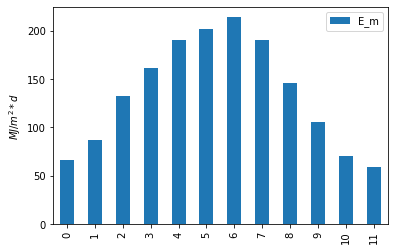

In [14]:
j=data["outputs"]["monthly"]["fixed"]
jf= json.dumps(j, indent=2)
df=pd.read_json(jf, orient='records') 
dfp=df
df=df.to_html()

# E=irradiacion
# E=850 para probar con los datos del idae

ax=dfp.plot(kind='bar',y=['E_m']);ax.set_ylabel("$MJ / m^2 * d$");
dfp

{{dfp}}